# Data Sampling

## Import Packages

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from random import sample

## Read Data

In [88]:
df_books_final = pd.read_csv('df_books_final.csv')


In [89]:
df_books_final.head(3)

,book_id,title,description,average_rating,ratings_count,text_reviews_count,top_popular_shelves,author_ids,format_Audio,format_Digital,...,lang_tha,lang_tr,lang_tur,lang_ukr,lang_vi,lang_vie,lang_zh,length_long,length_medium,length_short
0,1882090,"Behave Yourself, Bethany Brant",A preacher's daughter with lots of curiosity a...,-1.028630,-0.059069,-0.136278,"[{'count': '1', 'name': 'mrs-withdrawn'}, {'co...",['151369'],False,False,...,False,False,False,False,False,False,False,False,True,False
1,166120,Ghosthunters And The Incredibly Revolting Ghost,A $2.99 value-priced edition of one of our bes...,-0.690046,-0.059069,-0.126186,"[{'count': '9', 'name': 'owned'}, {'count': '9...",['15873'],False,False,...,False,False,False,False,False,False,False,False,True,False
2,8608741,Attack of the Chicken Nugget Man: A National T...,Third-grader Chris Robb just can't seem to do ...,-0.597705,-0.059069,-0.102639,"[{'count': '2', 'name': 'books-i-wrote'}, {'co...",['2868520'],False,False,...,False,False,False,False,False,False,False,False,True,False


In [90]:
df_interactions_final_merged = pd.read_csv('df_interactions_final_merged.csv')

In [91]:
print(df_interactions_final_merged.shape)
df_interactions_final_merged.head(3)

(6626989, 10)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes,review_age,processed_review,sentiment
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,2015-11-17 19:37:35+00:00,7.0,3248,fun sequel original,0.680800
1,8842281e1d1347389f2ab93d60773d4d,18296097,bc9cff98f54be3b2b8c5b34598a7546c,5,NaN,2015-09-21 15:16:57+00:00,NaN,3305,NaN,0.574139
2,8842281e1d1347389f2ab93d60773d4d,817720,75fd46041466ceb406b7fd69b089b9c5,5,NaN,2015-05-21 04:29:23+00:00,NaN,3429,NaN,0.574139


## Remove books not in df_books_final

In [92]:
df_books_final['book_id'].nunique()

59828

In [93]:
filtered_df = df_interactions_final_merged[df_interactions_final_merged['book_id'].isin(df_books_final['book_id'])]

In [94]:
filtered_df.shape

(5073716, 10)

## Remove interactions without review texts

In [60]:
# filtered_df = filtered_df[filtered_df['review_text_incomplete'].notna()]

In [61]:
filtered_df.shape

(554955, 10)

## Sampling Data from Interactions

In [95]:
# Group by user to plot number of reviews per user
user_review_counts = filtered_df.groupby('user_id').size().reset_index(name='review_count')
user_review_counts_sorted = user_review_counts.sort_values(by='review_count', ascending=False)
print(user_review_counts_sorted['review_count'].describe())

count    435942.000000
mean         11.638512
std          51.215611
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max        7560.000000
Name: review_count, dtype: float64


<Axes: xlabel='review_count'>

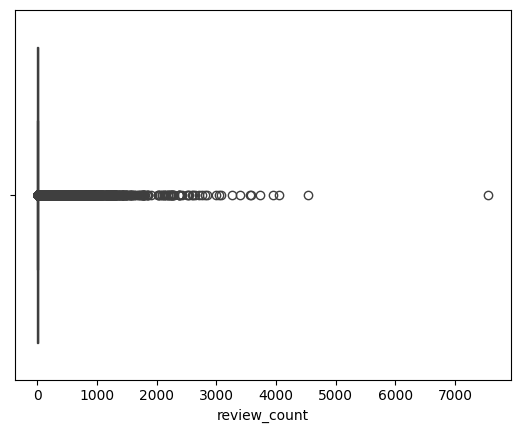

In [96]:
sns.boxplot(x='review_count', data=user_review_counts_sorted)

In [104]:
# filter users (by user_id) with less than 10 reviews
users_under_10 = user_review_counts_sorted[(user_review_counts_sorted['review_count'] <= 15) & (user_review_counts_sorted['review_count'] >= 5)]
print(users_under_10.shape)

(103988, 2)


In [110]:
# sampling half of the users with less than 10 reviews
sampled_users_df = users_under_10.sample(frac=0.9)
sampled_users_df = users_under_10
print(sampled_users_df.shape)
sampled_users_df.head()

(103988, 2)


,user_id,review_count
327182,c0051a219cbb641bbe892fc2b5115ffa,15
107171,3eff5ef20f1c63265a2e16a5ad6efa8b,15
421440,f77e0f003b518d1a4fadf9ef468358dc,15
387625,e39ce22a3dafc1035aad3a9fbedeacba,15
9882,05d15709d1182001111a71ce8ee274c1,15


In [108]:
# sampling half of the users with less than 10 reviews
sampled_users_df = users_under_10.sample(frac=0.9)
sampled_users_df = users_under_10
print(sampled_users_df.shape)
sampled_users_df.head()

(103988, 2)


,user_id,review_count
327182,c0051a219cbb641bbe892fc2b5115ffa,15
107171,3eff5ef20f1c63265a2e16a5ad6efa8b,15
421440,f77e0f003b518d1a4fadf9ef468358dc,15
387625,e39ce22a3dafc1035aad3a9fbedeacba,15
9882,05d15709d1182001111a71ce8ee274c1,15


In [100]:
print(sampled_users_df['review_count'].describe())

count    103988.000000
mean          8.464707
std           3.022872
min           5.000000
25%           6.000000
50%           8.000000
75%          11.000000
max          15.000000
Name: review_count, dtype: float64


<Axes: xlabel='review_count'>

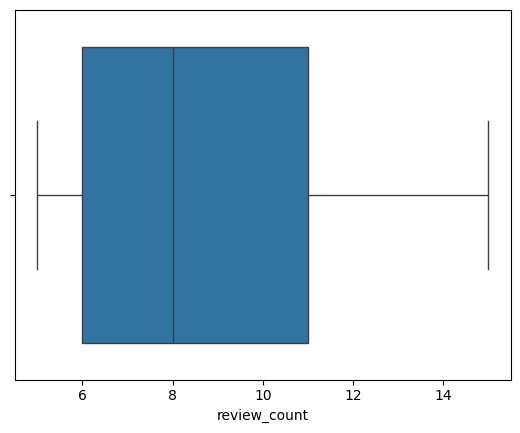

In [101]:
sns.boxplot(x='review_count', data=sampled_users_df)

In [102]:
sampled_interactions_df = df_interactions_final_merged[df_interactions_final_merged['user_id'].isin(sampled_users_df['user_id'])]
print(sampled_interactions_df.shape)
sampled_interactions_df.head(3)

(1172044, 10)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes,review_age,processed_review,sentiment
93,06316bec7a49286f1f98d5acce24f923,47693,515dd9fa2472f63c23b8e79614ba2e7c,5,NaN,2012-06-05 16:34:47+00:00,NaN,4508,NaN,0.574139
94,06316bec7a49286f1f98d5acce24f923,30118,b9e067e3cb956265377acd987bad4d47,4,NaN,2012-06-05 02:44:17+00:00,NaN,4509,NaN,0.527973
95,06316bec7a49286f1f98d5acce24f923,144974,0437e62cf615cad6926ceef7597d1705,5,NaN,2012-06-05 02:33:59+00:00,NaN,4509,NaN,0.574139


In [69]:
sampled_interactions_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text_incomplete',
       'date_added', 'n_votes', 'review_age', 'processed_review', 'sentiment'],
      dtype='object')

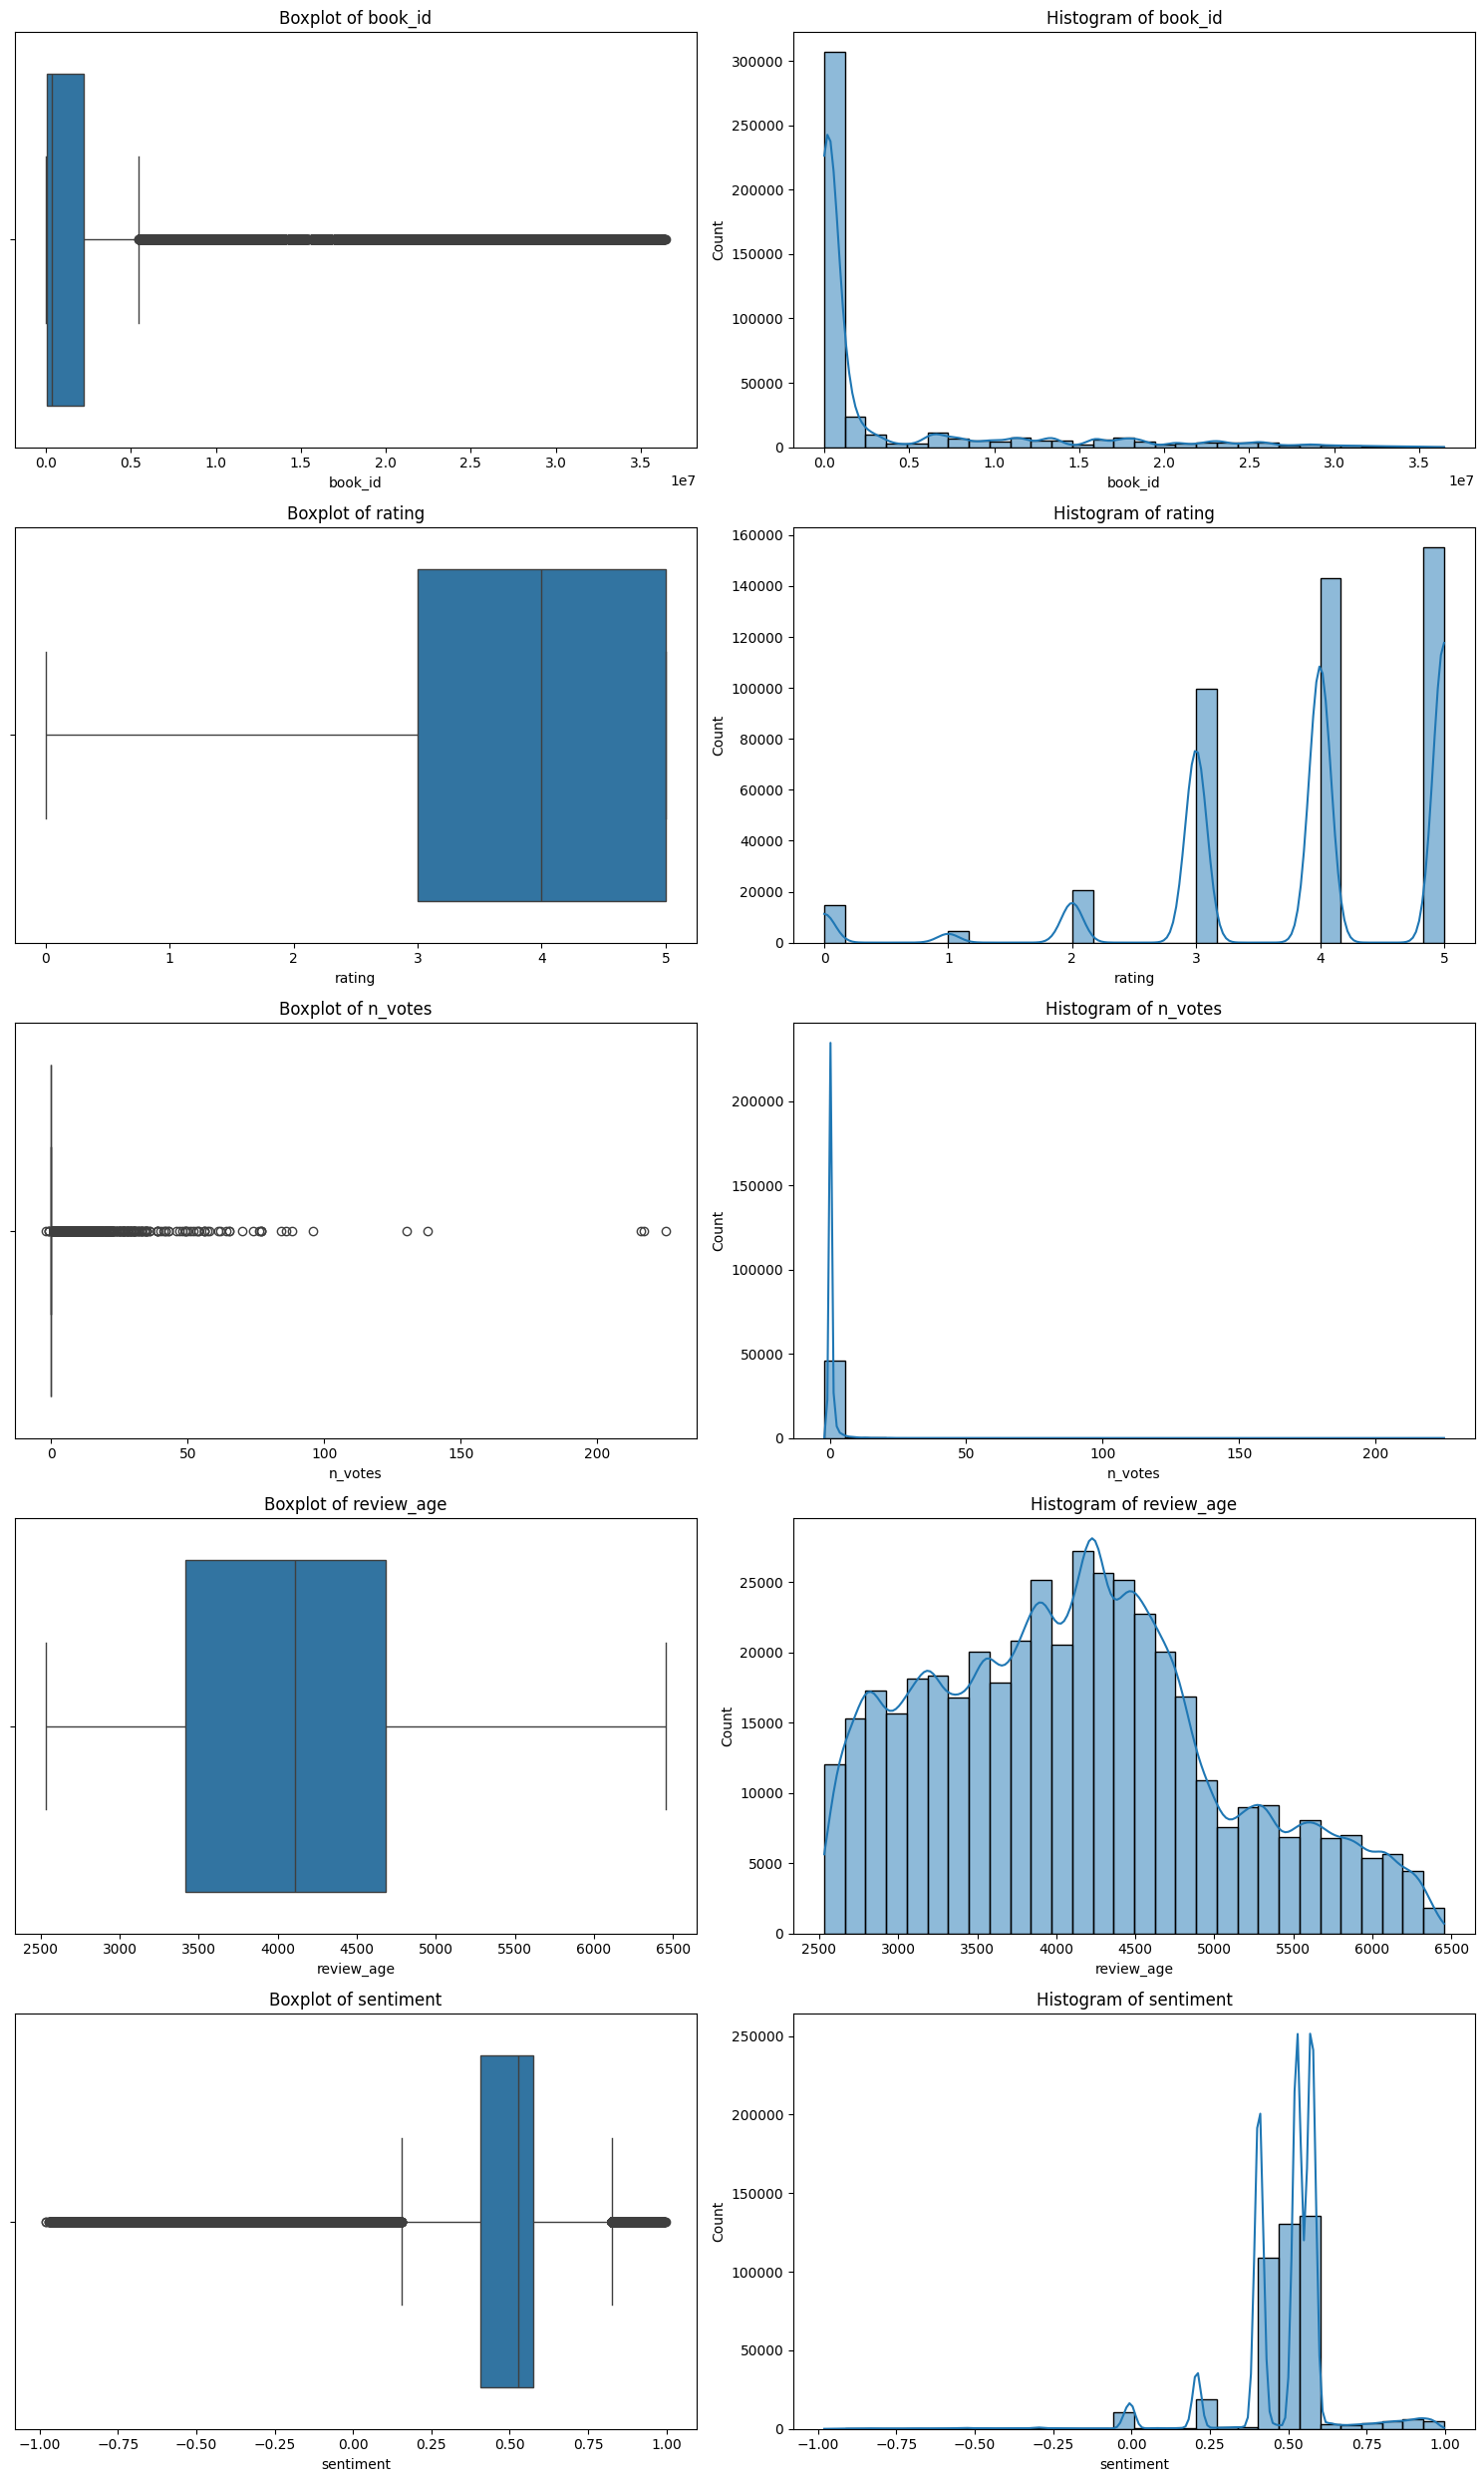

In [70]:
# Define function to plot distribution of numerical variables
def plot_distributions(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(['number']).columns

    # Create subplots: one row for each feature, with both a boxplot and a histogram
    n_cols = len(numerical_cols)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5 * n_cols))
    
    for i, col in enumerate(numerical_cols):
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[i, 0])
        axes[i, 0].set_title(f'Boxplot of {col}')
        
        # Histogram
        sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

plot_distributions(sampled_interactions_df)

In [71]:
sampled_interactions_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text_incomplete',
       'date_added', 'n_votes', 'review_age', 'processed_review', 'sentiment'],
      dtype='object')

## Removing Redundant Columns

In [85]:
sampled_interactions_df.drop(columns=['review_id', 'review_text_incomplete', 'date_added', 'processed_review'], inplace=True)

C:\Users\rayna\AppData\Local\Temp\ipykernel_10364\1205395776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_interactions_df.drop(columns=['review_id', 'review_text_incomplete', 'date_added', 'processed_review'], inplace=True)


In [86]:
sampled_interactions_df.shape

(1498077, 6)

# Export Sampled Interactions Data to CSV

In [87]:
sampled_interactions_df.to_csv('df_interactions_2to25reviews.csv', index=False)